In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
home_page = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/5.Funnel_Analysis/home_page_table.csv")
home_page.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [3]:
payment_confirmation = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/5.Funnel_Analysis/payment_confirmation_table.csv")
payment_confirmation.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [4]:
payment_page = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/5.Funnel_Analysis/payment_page_table.csv")
payment_page.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [5]:
search_page = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/5.Funnel_Analysis/search_page_table.csv")
search_page.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [6]:
user = pd.read_csv("C:/Sophia/School!!!/2023 Spring 1/DS take home/5.Funnel_Analysis/user_table.csv")
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [7]:
user.count()

user_id    90400
date       90400
device     90400
sex        90400
dtype: int64

In [8]:
user.nunique()

user_id    90400
date         120
device         2
sex            2
dtype: int64

### Data Processing

In [9]:
data = pd.merge(left=user, right=home_page, how='left', on='user_id')
data = pd.merge(left=data, right=search_page, how='left', on='user_id', suffixes=('_home', '_search'))
data = pd.merge(left=data, right=payment_page, how='left', on='user_id')
data = pd.merge(left=data, right=payment_confirmation, how='left', on='user_id', suffixes=('_payment', '_confirmation'))

data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            90400 non-null  int64 
 1   date               90400 non-null  object
 2   device             90400 non-null  object
 3   sex                90400 non-null  object
 4   page_home          90400 non-null  object
 5   page_search        45200 non-null  object
 6   page_payment       6030 non-null   object
 7   page_confirmation  452 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


##### Order of funnel: home page -> search page -> payment page -> payment confirmation

### Analysis

In [11]:
data['page_home'] = data['page_home'].apply(lambda x: 1 if x =='home_page' else 0.0)
data['page_search'] = data['page_search'].apply(lambda x: 1 if x =='search_page' else 0.0)
data['page_payment'] = data['page_payment'].apply(lambda x: 1 if x == 'payment_page' else 0.0)
data['page_confirmation'] = data['page_confirmation'].apply(lambda x: 1 if x == 'payment_confirmation_page' else 0.0)

##### Whole process

In [12]:
conv_ratio = pd.DataFrame(data[['page_home', 'page_search', 'page_payment', 'page_confirmation']].mean())
conv_ratio.columns = ['conversion_ratio']
conv_ratio

,conversion_ratio
page_home,1.000000
page_search,0.500000
page_payment,0.066704
page_confirmation,0.005000


Text(0.5, 1.0, 'Conversion Rate for whole process')

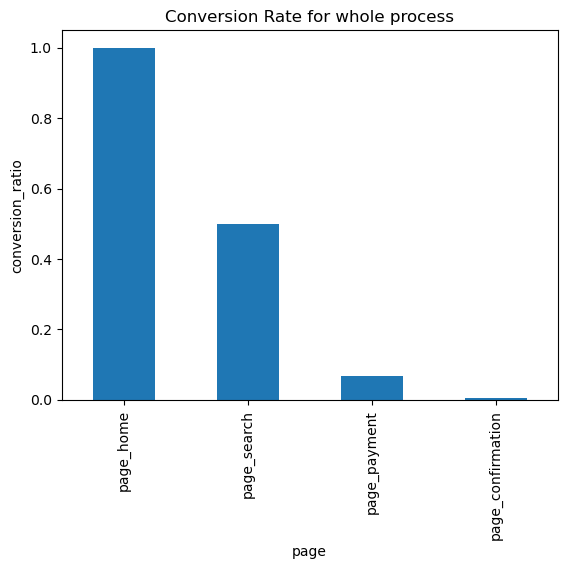

In [13]:
conversion_ratio = data[['page_home', 'page_search', 'page_payment', 'page_confirmation']].mean()
conversion_ratio.plot(kind='bar')
plt.xlabel('page')
plt.ylabel('conversion_ratio')
plt.title('Conversion Rate for whole process')

##### By device

In [14]:
by_device = data.groupby('device').mean()
conversion_ratio_device = by_device[['page_home', 'page_search', 'page_payment', 'page_confirmation']]
conversion_ratio_device

,page_home,page_search,page_payment,page_confirmation
device,,,,
Desktop,1.0,0.5,0.05,0.002492
Mobile,1.0,0.5,0.10,0.010000


Text(0.5, 1.0, 'Conversion Rate by Device')

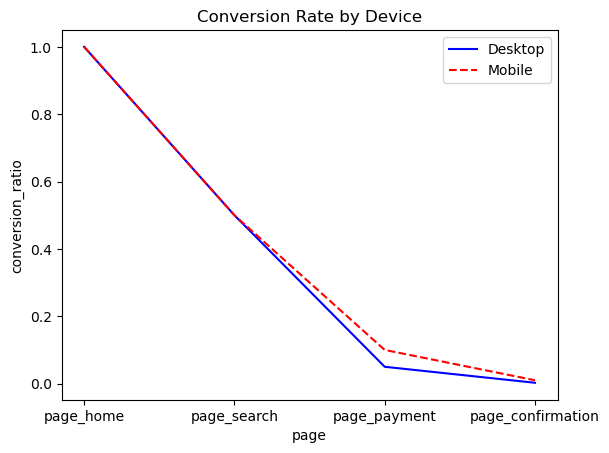

In [15]:
plt.plot(conversion_ratio_device.iloc[0,0:].index.tolist(),conversion_ratio_device.iloc[0,0:].values.tolist(),'-b',label = 'Desktop')
plt.plot(conversion_ratio_device.iloc[1,0:].index.tolist(),conversion_ratio_device.iloc[1,0:].values.tolist(),'--r',label = 'Mobile')
plt.legend()
plt.xlabel('page')
plt.ylabel('conversion_ratio')
plt.title('Conversion Rate by Device')

In [16]:
by_device_total = data.groupby('device').sum()
conversion_ratio_device2 = by_device_total[['page_home', 'page_search', 'page_payment', 'page_confirmation']]
conversion_ratio_device2

,page_home,page_search,page_payment,page_confirmation
device,,,,
Desktop,60200,30100.0,3010.0,150.0
Mobile,30200,15100.0,3020.0,302.0


We can find that more people are using desktop to land on the home page, which is twice as mobile users. 
However, mobile user's conversion rates are higher in stages from search to payment and from payment to confirmation. Thus, we will recommend engineering team to optimize the ux design of desktop version since most of people are from desktop source.

##### By Gender

In [17]:
by_gender = data.groupby('sex').mean()
conversion_ratio_gender = by_gender[['page_home', 'page_search', 'page_payment', 'page_confirmation']]
conversion_ratio_gender

,page_home,page_search,page_payment,page_confirmation
sex,,,,
Female,1.0,0.503073,0.068774,0.005347
Male,1.0,0.496944,0.064644,0.004655


Text(0.5, 1.0, 'Conversion Rate by Gender')

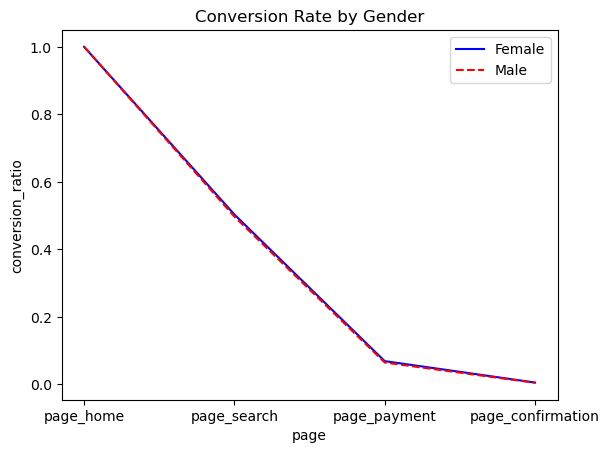

In [18]:
plt.plot(conversion_ratio_gender.iloc[0,0:].index.tolist(),conversion_ratio_gender.iloc[0,0:].values.tolist(),'-b',label = 'Female')
plt.plot(conversion_ratio_gender.iloc[1,0:].index.tolist(),conversion_ratio_gender.iloc[1,0:].values.tolist(),'--r',label = 'Male')
plt.legend()
plt.xlabel('page')
plt.ylabel('conversion_ratio')
plt.title('Conversion Rate by Gender')

In [19]:
by_gender_total = data.groupby('sex').sum()
conversion_ratio_gender2 = by_gender_total[['page_home', 'page_search', 'page_payment', 'page_confirmation']]
conversion_ratio_gender2

,page_home,page_search,page_payment,page_confirmation
sex,,,,
Female,45075,22676.0,3100.0,241.0
Male,45325,22524.0,2930.0,211.0


The number of people and the conversion rate of female and male are basically the same.

##### Time Trend

In [20]:
min(data.date)

'2015-01-01'

In [21]:
max(data.date)

'2015-04-30'

In [22]:
date_group = data.groupby('date').sum()
date_group

,user_id,page_home,page_search,page_payment,page_confirmation
date,,,,,
2015-01-01,370222931,712,436.0,76.0,6.0
2015-01-02,367816380,721,447.0,84.0,5.0
2015-01-03,389015069,760,422.0,64.0,7.0
2015-01-04,360536679,713,447.0,76.0,7.0
2015-01-05,386553813,754,462.0,88.0,11.0
...,...,...,...,...,...
2015-04-26,384071273,792,307.0,25.0,1.0
2015-04-27,403548676,779,311.0,26.0,1.0
2015-04-28,365677117,736,304.0,25.0,1.0


[Text(0.5, 0, 'Date'), Text(0, 0.5, '# of visitors')]

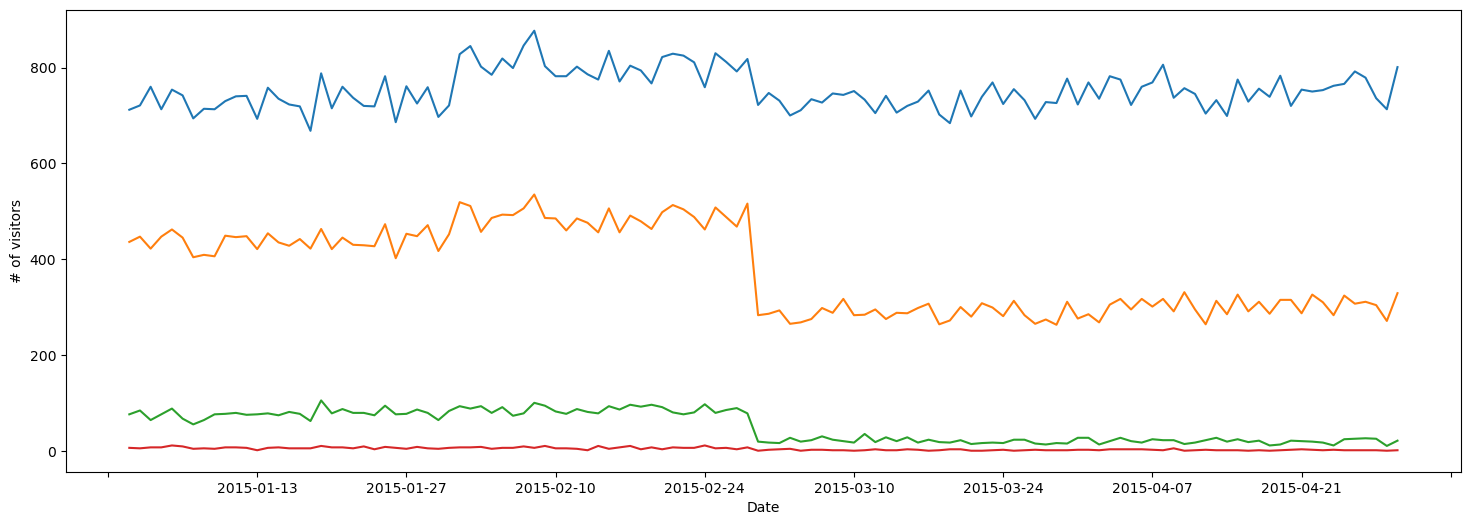

In [23]:
fig,ax = plt.subplots(1,1,figsize = (18,6))
sns.lineplot(x=date_group.index, y="page_home",data=date_group)
sns.lineplot(x=date_group.index, y="page_search",data=date_group)
sns.lineplot(x=date_group.index, y="page_payment",data=date_group)
sns.lineplot(x=date_group.index, y="page_confirmation",data=date_group)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.set(xlabel='Date', ylabel='# of visitors')

We can find at the end of the first quarter, there happens a strong decrease of the # of visitors. Thus, we can ask the engineering team if we made any change of our website or discussed with the prodcut team what did we promote during that time.

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Conversion Rate')]

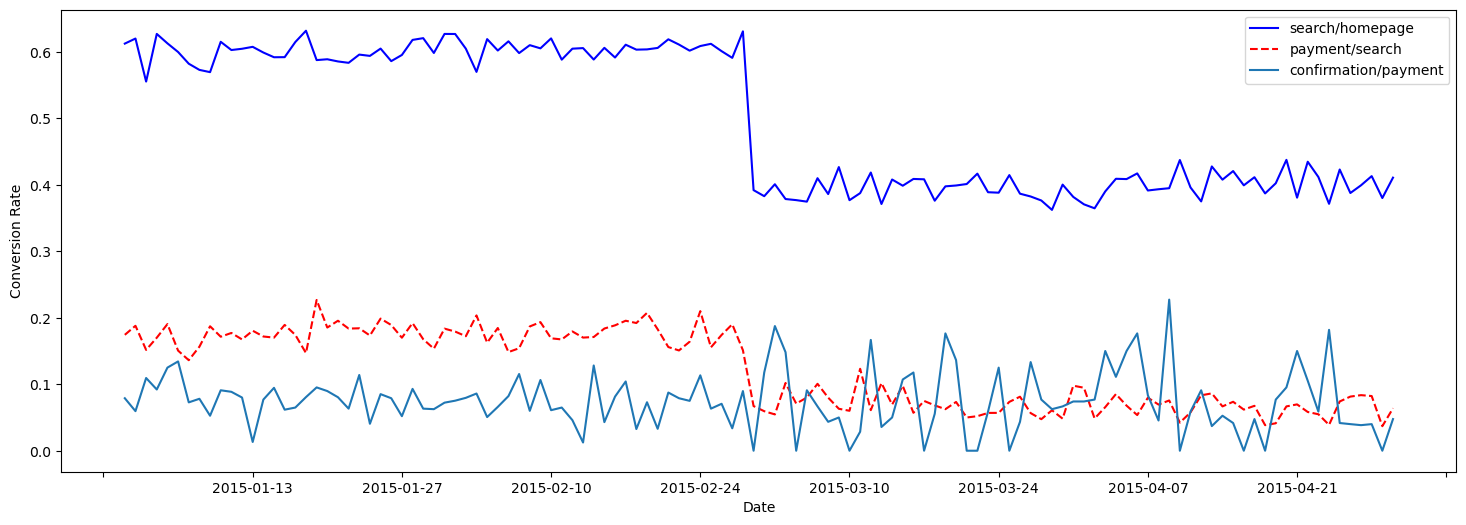

In [24]:
fig,ax = plt.subplots(1,1,figsize = (18,6))
date_group['search/homepage'] = date_group['page_search']/date_group['page_home']
date_group['payment/search'] = date_group['page_payment']/date_group['page_search']
date_group['confirmation/payment'] = date_group['page_confirmation']/date_group['page_payment']
plt.plot(date_group.index, date_group["search/homepage"],'-b',label = 'search/homepage')
plt.plot(date_group.index, date_group["payment/search"],'--r',label = 'payment/search')
plt.plot(date_group.index, date_group["confirmation/payment"],label = 'confirmation/payment')
plt.legend()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.set(xlabel='Date', ylabel='Conversion Rate')

In terms of Conversion rate, we can find that less people are willing to move from home page to search page. Thus, we are able to make some assumption that there are some machine trouble or server trouble. Let's dig into that.

In [25]:
date_device_group = data.groupby(['date','device']).sum()
date_device_group['search/homepage'] = date_device_group['page_search']/date_device_group['page_home']
date_device_group['payment/search'] = date_device_group['page_payment']/date_device_group['page_search']
date_device_group['confirmation/payment'] = date_device_group['page_confirmation']/date_device_group['page_payment']
date_device_group = date_device_group.reset_index()
date_device_group.head()

,date,device,user_id,page_home,page_search,page_payment,page_confirmation,search/homepage,payment/search,confirmation/payment
0,2015-01-01,Desktop,255226828,493,256.0,47.0,1.0,0.519270,0.183594,0.021277
1,2015-01-01,Mobile,114996103,219,180.0,29.0,5.0,0.821918,0.161111,0.172414
2,2015-01-02,Desktop,250737151,484,261.0,44.0,1.0,0.539256,0.168582,0.022727
3,2015-01-02,Mobile,117079229,237,186.0,40.0,4.0,0.784810,0.215054,0.100000
4,2015-01-03,Desktop,265042744,507,222.0,22.0,3.0,0.437870,0.099099,0.136364


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Conversion Rate by device')]

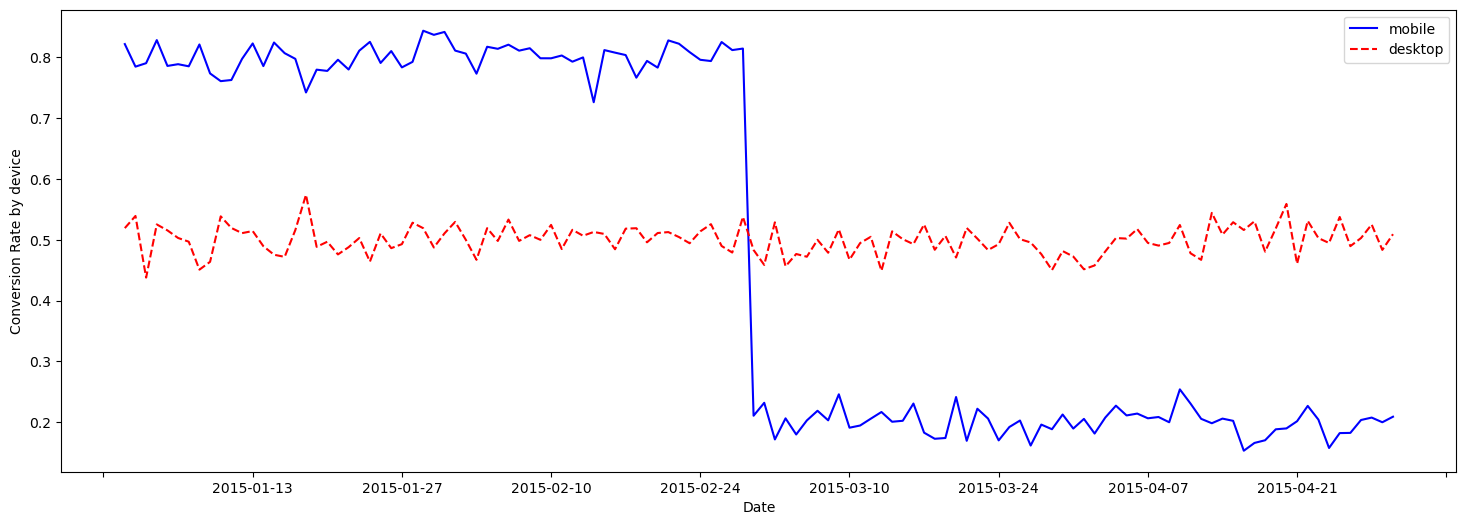

In [26]:
fig,ax = plt.subplots(1,1,figsize = (18,6))
mobile = date_device_group[date_device_group['device'] == 'Mobile']
desktop = date_device_group[date_device_group['device'] == 'Desktop']
plt.plot(mobile.date, mobile["search/homepage"],'-b',label = 'mobile')
plt.plot(desktop.date, desktop["search/homepage"],'--r',label = 'desktop')

plt.legend()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.set(xlabel='Date', ylabel='Conversion Rate by device')

From above chart, we can find that the mobile version may happen some trouble. We suggest engineering team to fix it immediately.

Summary
##### 1. Optimize the ux design and usage process at the stage of payment and confirmation on desktop version
More people landed their first homepage on desktop version, but the conversion rate, especially at the stage of payment and confirmation, are much smaller than mobile users

##### 2. Expand the advertisement on mobile version users.
Mobile version users conversion rate is pretty high at the key stages, which are payment and confirmation. If company want to improve the monetization capability, expand the mobile version users.

##### 3. Troubleshoot the mobile version's bug or optimze the search engine.
At the end of the first season, there is an obvious gap in usage procedure from home page to search page. The problem seemed to come from the mobile device, which should be fixed immediately.